In [47]:
import pandas as pd

In [48]:
dataset_url = "https://raw.githubusercontent.com/syaiful919/datasets/master/bbc_news.csv"

note: data diperoleh dari https://www.kaggle.com/yufengdev/bbc-fulltext-and-category

In [49]:
df = pd.read_csv(dataset_url)

In [50]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [51]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='category')

In [52]:
df_new.head()

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0


In [53]:
text = df_new['text'].values
label = df_new[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [54]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
num_words = 5000
tokenizer = Tokenizer(num_words=num_words, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sequence_train) 
padded_test = pad_sequences(sequence_test)

In [64]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
class stopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai 90%!")
      self.model.stop_training = False
    if(logs.get('val_accuracy')>0.9):
      print("\nAkurasi data validasi telah mencapai 90%!")
      self.model.stop_training = True
callbacks = stopCallback()

In [66]:
num_epochs = 20
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/20
56/56 - 188s - loss: 1.5984 - accuracy: 0.2483 - val_loss: 1.5279 - val_accuracy: 0.2921
Epoch 2/20
56/56 - 193s - loss: 1.4821 - accuracy: 0.4169 - val_loss: 1.4372 - val_accuracy: 0.4090
Epoch 3/20
56/56 - 192s - loss: 1.1254 - accuracy: 0.5831 - val_loss: 1.0702 - val_accuracy: 0.5685
Epoch 4/20
56/56 - 192s - loss: 0.5104 - accuracy: 0.8146 - val_loss: 0.7277 - val_accuracy: 0.7551
Epoch 5/20

Akurasi telah mencapai 90%!
56/56 - 196s - loss: 0.2155 - accuracy: 0.9365 - val_loss: 0.7364 - val_accuracy: 0.7461
Epoch 6/20

Akurasi telah mencapai 90%!
56/56 - 192s - loss: 0.1184 - accuracy: 0.9584 - val_loss: 0.9050 - val_accuracy: 0.7011
Epoch 7/20

Akurasi telah mencapai 90%!
56/56 - 194s - loss: 0.0490 - accuracy: 0.9876 - val_loss: 0.7308 - val_accuracy: 0.8180
Epoch 8/20

Akurasi telah mencapai 90%!
56/56 - 196s - loss: 0.0120 - accuracy: 0.9978 - val_loss: 0.6766 - val_accuracy: 0.8382
Epoch 9/20

Akurasi telah mencapai 90%!
56/56 - 191s - loss: 0.0034 - accuracy: 1.00

In [67]:
import matplotlib.pyplot as plt

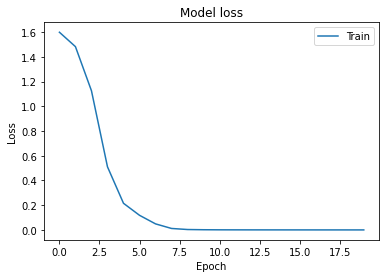

In [68]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

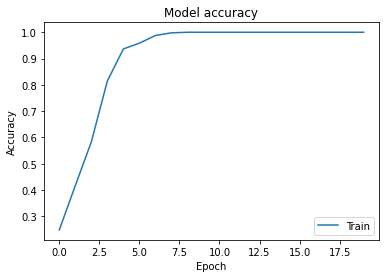

In [69]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()